# 데이터 확인하기

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
print(len(train))
train.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 누락값 개수 확인

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Cabin 칼럼은 누락값이 train과 test모두 많으므로 제외하는 것이 옳다

# 생존자수와 사망자수 확인

In [7]:
arrive = []
dead = []

for i in range(len(train['Sex'])) :
    if train['Survived'][i] == 0 :
        dead.append(train['Sex'][i])
    elif train['Survived'][i] == 1 :
        arrive.append(train['Sex'][i])
        
print('Survived Person : {} \nDead Person : {}'.format(len(arrive),len(dead)))

Survived Person : 342 
Dead Person : 549


# 클래스에 따른 생존비율 확인

* 클래스 확인

In [8]:
k = []
for i in train['Pclass'] :
    if i not in k :
        k.append(i)
print(np.sort(k))

[1 2 3]


In [9]:
ar_1_cnt,ar_2_cnt,ar_3_cnt = 0,0,0
de_1_cnt,de_2_cnt,de_3_cnt = 0,0,0

for i in range(len(train['Pclass'])) :
    if train['Pclass'][i] == 1 :
        if train['Survived'][i] == 1 :
            ar_1_cnt += 1
        else :
            de_1_cnt += 1
    elif train['Pclass'][i] == 2 :
        if train['Survived'][i] == 1 :
            ar_2_cnt += 1
        else :
            de_2_cnt += 1
    else :
        if train['Survived'][i] == 1 :
            ar_3_cnt += 1
        else :
            de_3_cnt += 1
        
print('Survived-Class1 : {}\t Survied-Class2 : {}\tSurvied-Class3 : {}'.format(ar_1_cnt,ar_2_cnt,ar_3_cnt))
print('Dead-Class1 : {}\t Dead-Class2 : {}\tDead-Class3 :{}'.format(de_1_cnt,de_2_cnt,de_3_cnt))

Survived-Class1 : 136	 Survied-Class2 : 87	Survied-Class3 : 119
Dead-Class1 : 80	 Dead-Class2 : 97	Dead-Class3 :372


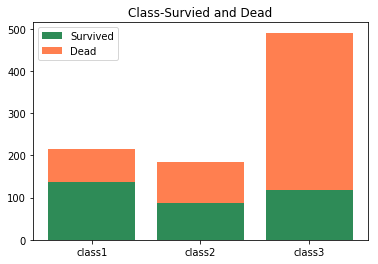

In [10]:
plt.figure()
plt.title('Class-Survied and Dead')
plt.bar([1,2,3],[ar_1_cnt,ar_2_cnt,ar_3_cnt],
        tick_label = ['class1','class2','class3'],
        label = 'Survived',
        color = 'seagreen')
plt.bar([1,2,3],[de_1_cnt,de_2_cnt,de_3_cnt],
        tick_label = ['class1','class2','class3'],
        bottom = [ar_1_cnt,ar_2_cnt,ar_3_cnt],
        label = 'Dead',
        color = 'coral')
plt.legend()

Class별 생존자 수와 사망자 수를 비교해 보았을 때 class별 생존자 수는 
class1일 경우에 가장 높지만 class별로 차이가 많이 없다.
그러나 class별 사망자 수의 경우에는 class3일 경우 사망자의 수가 압도적으로 높다.

그러므로 Pclass칼럼은 생존 여부를 판별하는데 중요한 칼럼임을 알 수 있다.

# 성별에 따른 생존비율 확인

* 성별에 따른 생존자수 사망자수 확인

In [11]:
ar_male_cnt = 0
ar_female_cnt = 0
de_male_cnt = 0
de_female_cnt = 0

for i in arrive :
    if i == 'male' :
        ar_male_cnt += 1
    else :
        ar_female_cnt += 1
        
for i in dead :
    if i == 'male' :
        de_male_cnt += 1
    else :
        de_female_cnt += 1
        
print('Survived-male : {}\t Survied-female : {}'.format(ar_male_cnt,ar_female_cnt))
print('Dead-male : {}\t\t Dead-female : {}'.format(de_male_cnt,de_female_cnt))

Survived-male : 109	 Survied-female : 233
Dead-male : 468		 Dead-female : 81


* 그래프로 표현해서 시각적으로 확인

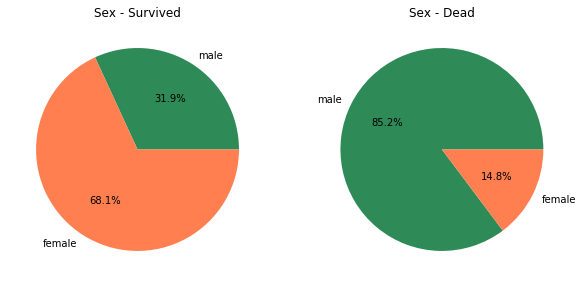

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].pie([ar_male_cnt , ar_female_cnt] , labels= ['male','female'] , colors = ['seagreen','coral'],
       autopct = '%.1f%%')
ax[0].title.set_text('Sex - Survived')

ax[1].pie([de_male_cnt , de_female_cnt] , labels = ['male','female'] , colors = ['seagreen','coral'],
       autopct = '%.1f%%')
ax[1].title.set_text('Sex - Dead')
plt.show()

Survived : 342 , Dead : 549 중

살아남은 사람들의 비율은 여자가 약 70%정도로 높고
죽은 사람들의 비율은 남자가 85%정도로 남자가 높다

즉, 성별의 경우에는 생존여부를 예측하는데 중요한 칼럼임을 알 수 있다.

# 나이에 따른 생존비율 확인

* Age칼럼의 경우 누락값이 많으므로 누락값을 먼저 확인해야 한다.

In [13]:
print('Age-nan :',train['Age'].isnull().sum())
print('Age-total :',len(train['Age']))
print('누락 비율 : ','%.2f'%(train['Age'].isnull().sum()/len(train['Age']) * 100),'%')

Age-nan : 177
Age-total : 891
누락 비율 :  19.87 %


* 누락값을 대체를 해야할 지 판단하기 위해 데이터를 확인

In [14]:
print('Age mean : ',train['Age'].mean())
print('Age median : ',train['Age'].median())
print('Age max : ',train['Age'].max())
print('Age min : ',train['Age'].min())

Age mean :  29.69911764705882
Age median :  28.0
Age max :  80.0
Age min :  0.42


* 히스토그램을 통한 나아별 분포 확인

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


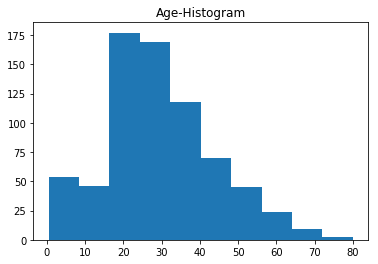

In [15]:
plt.figure()
plt.hist(train['Age'])
plt.title('Age-Histogram')
plt.show()

1. 누락값을 제외한 생존여부 판별

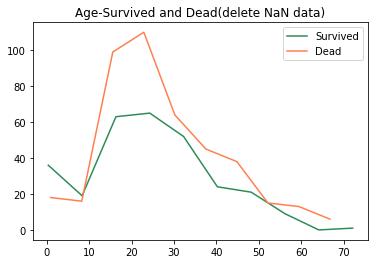

In [16]:
ar_Age = []
de_Age = []
for i in range(len(train['Age'])) :
    if train['Survived'][i] == 1 :
        if train['Age'][i] == train['Age'][i] :  #nan값은 자기자신과 비교할 수 없음
            ar_Age.append(train['Age'][i])
    else :
        if train['Age'][i] ==train['Age'][i] :
            de_Age.append(train['Age'][i])

arr1,bins1= np.histogram(ar_Age)
arr2,bins2= np.histogram(de_Age)
plt.figure()
plt.plot(bins1[:-1],arr1 , label = 'Survived',color = 'seagreen')
plt.plot(bins2[:-1],arr2 , label = 'Dead',color = 'coral')
plt.title('Age-Survived and Dead(delete NaN data)')
plt.legend()
plt.show()

탑승객은 20~30대가 가장 많으며 생존자와 사망자 역시 20~30대가 가장 많다. 
나이에 상관없이 탑승객의 수에 따라 생존자도 사망자도 비례하는 것을 알 수 있다.
그러므로, 누락값이 제외된 나이로 생존여부를 판단하기에는 나이 칼럼은 중요하지 않다는 것을 알 수 있다.

2. 누락값을 대체한 생존여부 판별

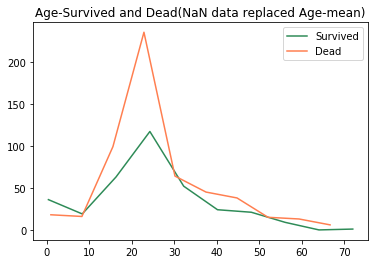

In [17]:
ar_Age = []
de_Age = []
for i in range(len(train['Age'])) :
    if train['Survived'][i] == 1 :
        if train['Age'][i] == train['Age'][i] :  #nan값은 자기자신과 비교할 수 없음
            ar_Age.append(train['Age'][i])
        else :
            ar_Age.append(train['Age'].mean())
    else :
        if train['Age'][i] ==train['Age'][i] :
            de_Age.append(train['Age'][i])
        else :
            de_Age.append(train['Age'].mean())

arr1,bins1= np.histogram(ar_Age)
arr2,bins2= np.histogram(de_Age)
plt.figure()
plt.plot(bins1[:-1],arr1 , label = 'Survived',color = 'seagreen')
plt.plot(bins2[:-1],arr2 , label = 'Dead',color = 'coral')
plt.title('Age-Survived and Dead(NaN data replaced Age-mean)')
plt.legend()
plt.show()

NaN 값을 대체 하더라도 대체하지 않았을 때와 같은 양상을 띄고 있다.
그렇다면 NaN값을 가진 데이터의 생존과 사망비율은 어떨까?

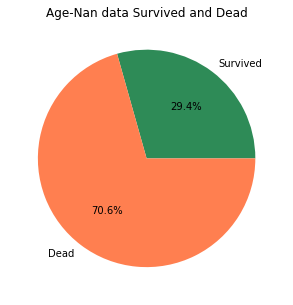

In [18]:
ar_nan_cnt = 0
de_nan_cnt = 0

for i in range(len(train['Age'])) :
    if train['Survived'][i] == 1 :
        if train['Age'][i] != train['Age'][i]  :
            ar_nan_cnt += 1
    else :
        if train['Age'][i] != train['Age'][i]  :
            de_nan_cnt += 1
            
plt.figure(figsize=(5,5))
plt.title('Age-Nan data Survived and Dead')
plt.pie([ar_nan_cnt,de_nan_cnt],labels = ['Survived','Dead'],autopct='%.1f%%',colors=['seagreen','coral'])
plt.show()

* NaN데이터의 경우 사망이 70% 생존이 30%로 만약 나이가 알려지지 않았다면 사망했을 확률이 높다는 것을 알 수있다.
* 나이 칼럼의 경우 사망과 생존을 예측하기에 중요한 칼럼이지 않지만 만약 나이가 알려지지않은 NaN데이터를 가졌을 경우 사망했을 확률이 높다는 것을 알 수 있다.

# 형제자매 또는 부모자녀 동석에 따른 비율 확인

* 마찬가지로 형제자매 또는 부모자녀의 동석이 생존여부에 영향을 미치는 가를 확인한다.

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
ar_sib,ar_parch = [], []
de_sib,de_parch = [], []
for i in range(len(train['SibSp'])) :
    if train['Survived'][i] == 1 :
        ar_sib.append(train['SibSp'][i])
        ar_parch.append(train['Parch'][i])
    else :
        de_sib.append(train['SibSp'][i])
        de_parch.append(train['Parch'][i])

* 가족의 수를 확인하여 그것을 토대로 히스토그램 형식으로 표현해준다

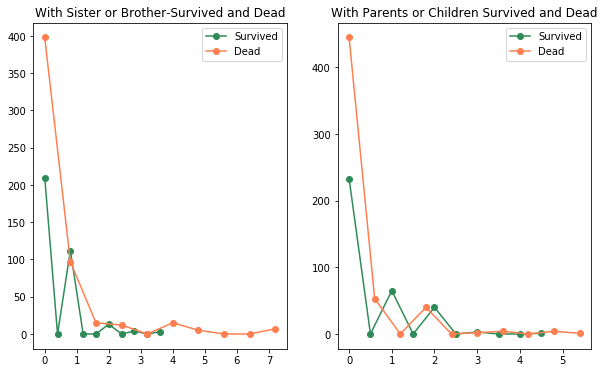

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ar_sib_hist = plt.hist(ar_sib)
de_sib_hist= plt.hist(de_sib)
ar_parch_hist = plt.hist(ar_parch)
de_parch_hist = plt.hist(de_parch)

plt.cla()
ax[0].plot(ar_sib_hist[1][:-1],ar_sib_hist[0],label = 'Survived',marker='o' , color = 'seagreen')
ax[0].plot(de_sib_hist[1][:-1],de_sib_hist[0],label = 'Dead',marker='o', color = 'coral')
ax[0].title.set_text('With Sister or Brother-Survived and Dead')
ax[0].legend()
#plt.figure()
ax[1].plot(ar_parch_hist[1][:-1],ar_parch_hist[0] ,label = 'Survived',marker='o' , color = 'seagreen')
ax[1].plot(de_parch_hist[1][:-1],de_parch_hist[0] ,label = 'Dead',marker='o' , color = 'coral')
ax[1].title.set_text('With Parents or Children Survived and Dead')
ax[1].legend()

* 홀로 탑승한 경우가 가장 많으므로 생존자와 사망자가 가장 많은 것은 당연한 양상을 띈다.
* 그러나 형제자매의 경우 적을 수록 생존자의 수가 많았다.
* 부모자녀의 경우 별다른 영향이 없어 보인다.

# 운임요금에 따른 생존비율 확인

* 요금에 따라 생존여부와 사망여부를 확인한다.

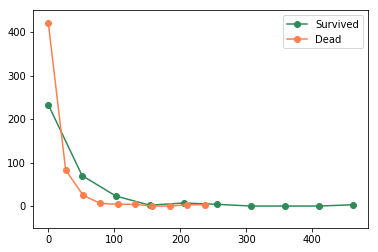

In [22]:
ar_fare , de_fare = [],[]
for i in range(len(train['Fare'])) :
    if train['Survived'][i] == 1 :
        ar_fare.append(train['Fare'][i])
    else :
        de_fare.append(train['Fare'][i])

ar_fare_hist = plt.hist(ar_fare)
de_fare_hist = plt.hist(de_fare)
plt.cla()
plt.plot(ar_fare_hist[1][:-1],ar_fare_hist[0],label = 'Survived',marker='o' , color = 'seagreen')
plt.plot(de_fare_hist[1][:-1],de_fare_hist[0],label = 'Dead',marker='o', color = 'coral')
plt.ylim(-50,450)
plt.legend()

* 사망자의 경우 운임요금을 적게 낸 승객일수록 많이 사망한 것으로 나타난다
* 생존자의 경우에서 재미난 부분은 운임요금을 매우 높게낸 승객들은 사망하지 않은 것으로 나타난 것이다.

# 탑승 선착장의 경우

In [23]:
e = []
for i in train['Embarked'] :
    if i not in e :
        e.append(i)
print(np.sort(e))

['C' 'Q' 'S' 'nan']


In [24]:
ar_C_cnt,ar_Q_cnt,ar_S_cnt, ar_nan_cnt = 0,0,0,0
de_C_cnt,de_Q_cnt,de_S_cnt, de_nan_cnt = 0,0,0,0

for i in range(len(train['Embarked'])) :
    
        if train['Embarked'][i] == 'C' :
            if train['Survived'][i] == 1 :
                ar_C_cnt += 1
            else :
                de_C_cnt += 1
                
        elif train['Embarked'][i] == 'Q' :
            if train['Survived'][i] == 1 :
                ar_Q_cnt += 1
            else :
                de_Q_cnt += 1
                
        elif train['Embarked'][i] == 'S' :
            if train['Survived'][i] == 1 :
                ar_S_cnt += 1
            else :
                de_S_cnt += 1
        else :
            if train['Embarked'][i] == 1 :
                ar_nan_cnt += 1
            else :
                de_nan_cnt += 1
        
print('Survived-C : {}\t Survied-Q : {}\tSurvied-S : {}\tSurvied-nan : {}'.format(ar_C_cnt,ar_Q_cnt,ar_S_cnt,ar_nan_cnt))
print('Dead-C : {}\t Dead-Q : {}\tDead-S :{}\tDead-nan: {}'.format(de_C_cnt,de_Q_cnt,de_S_cnt,de_nan_cnt))

Survived-C : 93	 Survied-Q : 30	Survied-S : 217	Survied-nan : 0
Dead-C : 75	 Dead-Q : 47	Dead-S :427	Dead-nan: 2


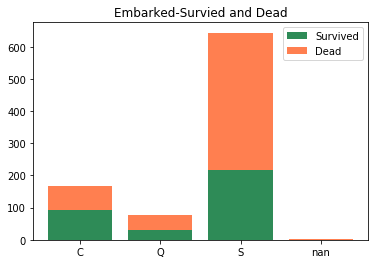

In [25]:
plt.figure()
plt.title('Embarked-Survied and Dead')
plt.bar([1,2,3,4],[ar_C_cnt,ar_Q_cnt,ar_S_cnt,ar_nan_cnt],
        tick_label = ['C','Q','S','nan'],
        label = 'Survived',
        color = 'seagreen')
plt.bar([1,2,3,4],[de_C_cnt,de_Q_cnt,de_S_cnt,de_nan_cnt],
        tick_label = ['C','Q','S','nan'],
        bottom = [ar_C_cnt,ar_Q_cnt,ar_S_cnt,ar_nan_cnt],
        label = 'Dead',
        color = 'coral')
plt.legend()

* 선착장의 경우 C,Q선착장은 대체로 비슷한 비율을 보이지만, S선착장의 경우에는 사망자가 확실히 많은 것을 확인할 수 있다.

# 데이터 전처리

* 머신러닝 모델에 넣기전에 머신러닝 모델에 입력될 수 있도록 데이터를 전처리 해주어야 한다.

In [26]:
x = []
y = []

cate = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for i in cate :
    tmpx = []
    for j in train[i] :
        tmpx.append(j)
    x.append(tmpx)
x = np.array(x).T

for i in train['Survived'] :
    y.append(i)
    
y = np.array(y)

print(' X')
print(x[:5])

print(' Y')
print(y[:5])

 X
[['3' 'male' '22.0' '1' '0' '7.25' 'S']
 ['1' 'female' '38.0' '1' '0' '71.2833' 'C']
 ['3' 'female' '26.0' '0' '0' '7.925' 'S']
 ['1' 'female' '35.0' '1' '0' '53.1' 'S']
 ['3' 'male' '35.0' '0' '0' '8.05' 'S']]
 Y
[0 1 1 1 0]


* x의 속성에는 문자열로 된 속성이 있고 이를 숫자로 바꿔줄 필요가 있다.

In [27]:
for i in range(len(x)) :
    if x[i][1] == 'male' :
        x[i][1] = 0
    elif x[i][1] == 'female' :
        x[i][1] = 1

for i in range(len(x)) :
    if x[i][-1] == 'C' :
        x[i][-1] = 0
    elif x[i][-1] == 'Q' :
        x[i][-1] = 1
    elif x[i][-1] == 'S' :
        x[i][-1] = 2
    else :
        x[i][-1] = 2  #누락값을 S로 대체 (S가 가장많이 죽었고 nan값 두개 모두 Dead이기때문)

for i in range(len(x)) :
    if x[i][2] == 'nan' :
        x[i][2] = round(train['Age'].mean(),2)  #나이의 nan값을 평균값으로 대체

x = x.astype(np.float64)
print(x[:5])

[[ 3.      0.     22.      1.      0.      7.25    2.    ]
 [ 1.      1.     38.      1.      0.     71.2833  0.    ]
 [ 3.      1.     26.      0.      0.      7.925   2.    ]
 [ 1.      1.     35.      1.      0.     53.1     2.    ]
 [ 3.      0.     35.      0.      0.      8.05    2.    ]]


# 모델에 훈련시켜 Acc확인하기

* 사용하고자 하는 모델을 import해준다.

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

* 모델로 평가하기

In [29]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
knn = clf.score(x,y)*100
clf = RandomForestClassifier()
clf.fit(x,y)
rfc = clf.score(x,y)*100
clf = ExtraTreesClassifier()
clf.fit(x,y)
etc = clf.score(x,y)*100
clf = DecisionTreeClassifier()
clf.fit(x,y)
etc = clf.score(x,y)*100
clf = LinearDiscriminantAnalysis()
clf.fit(x,y)
lda = clf.score(x,y)*100
clf = AdaBoostClassifier(learning_rate=0.1)
clf.fit(x,y)
abc = clf.score(x,y)*100
clf = GradientBoostingClassifier()
clf.fit(x,y)
gbc = clf.score(x,y)*100
clf = LogisticRegression()
clf.fit(x,y)
lr = clf.score(x,y)*100
clf = MLPClassifier()
clf.fit(x,y)
mlp = clf.score(x,y)*100
clf = SVC()
clf.fit(x,y)
svc = clf.score(x,y)*100

print('KNeighborsClassifier : {0:0.2f}%'.format(knn))
print('RandomForestClassifier : {0:0.2f}%'.format(rfc))
print('ExtraTreesClassifier : {0:0.2f}%'.format(etc))
print('DecisionTreeClassifier : {0:0.2f}%'.format(etc))
print('LinearDiscriminantAnalysis : {0:0.2f}%'.format(lda))
print('AdaBoostClassifier : {0:0.2f}%'.format(abc))
print('GradientBoostingClassifier : {0:0.2f}%'.format(gbc))
print('LogisticRegression : {0:0.2f}%'.format(lr))
print('MLPClassifier : {0:0.2f}%'.format(mlp))
print('SVC : {0:0.2f}%'.format(svc))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier : 83.84%
RandomForestClassifier : 96.86%
ExtraTreesClassifier : 98.20%
DecisionTreeClassifier : 98.20%
LinearDiscriminantAnalysis : 79.69%
AdaBoostClassifier : 80.47%
GradientBoostingClassifier : 89.34%
LogisticRegression : 80.13%
MLPClassifier : 82.04%
SVC : 89.34%


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 교차검증을 통해 모델별로 평가

In [30]:
kfold = StratifiedKFold(n_splits=10)

* 그래프를 통해 확인

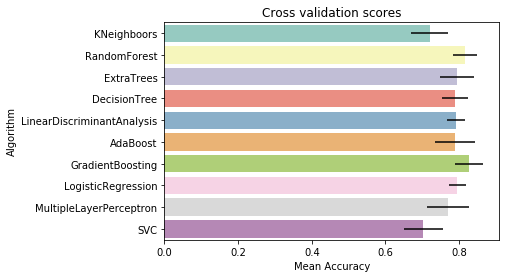

In [31]:
import seaborn as sns
random_state = 2
classifiers = []
classifiers.append(KNeighborsClassifier(n_neighbors=3))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["KNeighboors","RandomForest","ExtraTrees",
                                                                                      "DecisionTree","LinearDiscriminantAnalysis","AdaBoost",
                                                                                      "GradientBoosting","LogisticRegression","MultipleLayerPerceptron","SVC"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

* 순위를 매겨 가장 순위가 높은 알고리즘을 사용하여 제출파일을 만든다

In [32]:
cv_res.sort_values(by='CrossValMeans', ascending=False).reset_index(drop=True)

,CrossValMeans,CrossValerrors,Algorithm
0,0.827237,0.038257,GradientBoosting
1,0.814890,0.032914,RandomForest
2,0.794677,0.023038,LogisticRegression
3,0.793655,0.047032,ExtraTrees
4,0.791268,0.023966,LinearDiscriminantAnalysis
5,0.789184,0.054058,AdaBoost
6,0.787986,0.035375,DecisionTree
7,0.770133,0.056163,MultipleLayerPerceptron
8,0.719607,0.051061,KNeighboors
9,0.702841,0.053629,SVC


* GradientBoosting이 가장 정확하게 맞췄으므로 해당 알고리즘으로 제출한다

# 테스트 데이터 전처리

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
testx = []
for i in cate :
    tmpx = []
    for j in test[i] :
        tmpx.append(j)
    testx.append(tmpx)
testx = np.array(testx).T
print(testx[:5])
print(testx.shape)

[['3' 'male' '34.5' '0' '0' '7.8292' 'Q']
 ['3' 'female' '47.0' '1' '0' '7.0' 'S']
 ['2' 'male' '62.0' '0' '0' '9.6875' 'Q']
 ['3' 'male' '27.0' '0' '0' '8.6625' 'S']
 ['3' 'female' '22.0' '1' '1' '12.2875' 'S']]
(418, 7)


In [36]:
for i in range(len(testx)) :
    if testx[i][1] == 'male' :
        testx[i][1] = 0
    elif testx[i][1] == 'female' :
        testx[i][1] = 1

for i in range(len(testx)) :
    if testx[i][-1] == 'C' :
        testx[i][-1] = 0
    elif testx[i][-1] == 'Q' :
        testx[i][-1] = 1
    elif testx[i][-1] == 'S' :
        testx[i][-1] = 2
    else :
        testx[i][-1] = 2  #누락값을 S로 대체 (S가 가장많이 죽었고 nan값 두개 모두 Dead이기때문)

for i in range(len(testx)) :
    if testx[i][2] == 'nan' :
        testx[i][2] = round(train['Age'].mean(),2)  #나이의 nan값을 평균값으로 대체
        
for i in range(len(testx)) :
    if testx[i][-2] == 'nan' :
        testx[i][-2] = 0  #fare의 nan값을 평균값으로 대체(낮은 가격의 fare가 가장 많기 때문)

testx = testx.astype(np.float64)
print(testx[:5])
print(testx.shape)

[[ 3.      0.     34.5     0.      0.      7.8292  1.    ]
 [ 3.      1.     47.      1.      0.      7.      2.    ]
 [ 2.      0.     62.      0.      0.      9.6875  1.    ]
 [ 3.      0.     27.      0.      0.      8.6625  2.    ]
 [ 3.      1.     22.      1.      1.     12.2875  2.    ]]
(418, 7)


* 선택된 알고리즘으로 test 제출 데이터를 생성한다

In [37]:
clf = GradientBoostingClassifier()
clf.fit(x,y)
Y_pred = clf.predict(testx)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [38]:
submission.to_csv('submission.csv', index=False)